# AI@University - Preparation Material
This preparation material aims to give you an intuition on the activities and skills needed during the upcoming workshop at your university. The center piece of this workshop will be a compact hacking competition, in which you solve a given customer case in small groups, using Machine Learning. This notebook illustrates the general approach to solving such a case study, and it is recommended to follow a similar structure during the hacking competition of the workshop.

### Prerequisites
Familiarity with the **Python 3** programming language, related libraries, such as **pandas**, **numpy** or **scikit-learn**, as well as **Jupyter Notebooks** are required. So before the workshop, please make sure that you have installed Python 3 and Juypter Notebooks, preferrably using the [Anaconda distribution](https://www.anaconda.com/download/#macos), as it already contains a set of useful Data Science libraries.

**Note**:
* When downloading this file to macOS, it automatically gets converted to a text file. To be able to open it as a Jupyter Notebook, select the file and press `command` + `i`. In the opening detail view, delte the file ending `.txt`

# Case Study: Thomas J. Watson Hospital - Oncology Department
You have been hired as a consulting team of Data Scientists by the oncology department of the **Thomas J. 
Watson Hospital** in **Berlin**.

The oncology department is highly recognized and attracts patients from all over the world
due to its exceptional and effective treatment methods.

To maintain its excellent reputation and pioneer in the area of cancer treatment, the Thomas J. Watson hospital
setup a new Technology Council with the goal to investigate future-oriented technologies to support its oncologists. Concretely, the Council agreed to target the identification of breast cancer in its early stages, which enables treating the disease more effectively.

You have been engaged by the Technology Counsil to find a solution that assists the oncologists in classifying whether a breast tumor is 
**malignant** or **benign**.

You should present your results to the hospital board coming Friday. Keep in mind to present your findings in a way
that both business and technical stakeholders feel addressed.

## Business Understanding
Breast cancer is the most common cancer among women and one of the major causes of death worldwide.
Every year approximately 124 out of 100,000 women are diagnosed with breast cancer, and the estimation is that 23 out of the 124 women will die of this disease. When  detected  in  its  early  stages,  there  is  a  30%  chance that  the cancer can be treated effectively, but the late detection of advanced-stage tumors makes the treatment more difficult.

### Business objectives:
__What does our client want?__ Our client wants a technical solution capable of classifying breast cancer based on early stage properties of analised lumps. This is not meant as a replacement of human practitioners, but rather as an additional tool in their toolbox to provide effective screening.

__Do I need AI for that?__ You could probably come up with other solutions, but for the sake of this demo we'll just say "yes, you do" ;)

### Assess situation:
__What are available resources?__ For this use case we'll provide you with the data to use for your application. In real life having a good picture of what data could be obtained, as well as knowing how many people will work on the developmen, is crucial to understand *if* the solution is feasible and in how much time! (You'll typically agree on a deadline with the client).

### Technical goals:
__When is a solution "good enough"?__ This would be something to be discussed with medical practitioners, who have first hand experience with tumor diagnosis, and are the targeted users for our application. If at the end of the development they find our solution not good enough, we will have wasted a lot of time and money.

## Data Understanding
### Collect data
__What kind of data do you have?__
This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg:

**Wisconsin Breast Cancer Database** (January 8, 1991), O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18, link: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

__Can it be used freely?__ If it's data you found online (like in this case) you'll have to read the Terms of Use. If it's private data, always check with the provider! In this case the Citation Policy of this dataset requires us to cite the source as done just above.

### Explore data
__What variables do I have?__
The database is a `.csv` file, i.e. a table: each row corresponds to one analyzed "lump", which could turn out to be benign or malign. Each column corresponds to one specific property of such lump. The last column, `class`, is called the label, because it labels the lump as good or bad.

Attribute|Description
---|---
sample_code_number|ID number of sample
clump_thickness|In the Clump thickness benign cells tend to be grouped in monolayers, while cancerous cells are often grouped in multilayer.
uniformity_of_cell_size|While in the Uniformity of cell size/shape the cancer cells tend to vary in size and shape. That is why these parameters are valuable in determining whether the cells are cancerous or not. 
uniformity_of_cell_shape|see above
marginal_adhesion|In the case of Marginal adhesion the normal cells tend to stick together, where cancer cells tend to lose this ability. So loss of adhesion is a sign of malignancy.
single_epithelial_cell_size|In the Single epithelial cell size the size is related to the uniformity mentioned above. Epithelial cells that are significantly enlarged may be a malignant cell.
bare_nuclei|The Bare nuclei is a term used for nuclei that is not surrounded by cytoplasm (the rest of the cell). Those are typically seen in benign tumors. 
bland_chromatin|The Bland Chromatin describes a uniform "texture" of the nucleus seen in benign cells. In cancer cells the chromatin tends to be coarser. 
normal_nucleoli|The Normal nucleoli are small structures seen in the nucleus. In normal cells the nucleolus is usually very small if visible. In cancer cells the nucleoli become more prominent, and sometimes there are more of them. 
mitoses|Finally, Mitoses is nuclear division plus cytokines and produce two identical daughter cells during prophase. It is the process in which the cell divides and replicates. Pathologists can determine the grade of cancer by counting the number of mitoses
class|Label: Benign=2, Malignant=4



To answer the other questions in this phase, we dig a bit deeper in the data:

#### Setup

In [45]:
from time import time
from collections import Counter
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Specify in which directory the input data is kept.

In [4]:
data_directory = Path('./data')

Let's first look at the labelled data, which we can use for training:

In [5]:
data = pd.read_csv(data_directory / 'breast_cancer_train.csv')
print(data.shape[1] - 1,'features and',data.shape[0],'training examples')
data.head()

10 features and 559 training examples


,sample_code_number,uniformity_of_cell_shape,uniformity_of_cell_size,clump_thickness,bare_nuclei,cell_size,normal_nucleoli,clump_cohesiveness,nuclear_chromatin,mitoses,class
0,557583,5,10,10,10,10,10,10,1,1,4
1,1230688,7,4,7,4,3,7,7,6,1,4
2,787451,5,1,2,1,2,1,1,1,1,2
3,1238777,1,1,1,1,2,1,1,1,1,2
4,1371026,5,10,10,10,4,10,5,6,3,4


__Is there enough information to solve the task?__ The dataset contains 10 features (the non-label columns) which potentially correlate with a tumor being benign or malign, and we have ~550 training examples. A rule of thumb for starters is that you need to have *at least* 10 times more training examples than the number of features in order for the model to learn something. This is not always true (data might be garbage), but if already at this stage you see you don't have sufficient data, you can save a lot of time by first searching for better data, instead of diving in the development phases.

Now let's look at the test data (which is not labelled because we don't know in advance what the true label is):


In [6]:
data_test = pd.read_csv(data_directory / 'breast_cancer_test.csv')
print(data.shape[1] - 1,'features and',data_test.shape[0],'test examples')
data_test.head()

10 features and 140 test examples


,sample_code_number,uniformity_of_cell_shape,uniformity_of_cell_size,clump_thickness,bare_nuclei,cell_size,normal_nucleoli,clump_cohesiveness,nuclear_chromatin,mitoses,class
0,1056171,2,1,1,1,2,1,2,1,1,NaN
1,1179818,2,1,1,1,2,1,3,1,1,NaN
2,1334015,7,8,8,7,3,10,7,2,3,NaN
3,1287282,3,1,1,1,2,1,1,1,1,NaN
4,1265899,4,1,1,1,2,1,3,1,1,NaN


As we can see, that test data is missing values for the target value `class`, which should be predicted by our algorithm.

__How are variables distributed?__ 

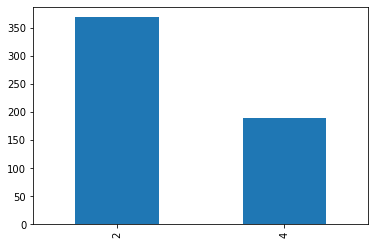

In [7]:
data["class"].value_counts().plot(kind="bar")

The bar plot above tells us that our training set has a larger number of examples with `class` = 2 (i.e. benign tumors) than with `class` = 4. This is called *class imbalance* and is to be expected in almost all real world datasets. Machine learning classifiers generally perform better when they can learn from an equal number of events for each class. A few techniques to correct for class imbalance are:
- Get more data (always do it if you can!)
- Undersampling (only take a subset of the majority class examples)
- Oversampling (artificially generate examples for the minority class)

The [imbalanced-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) package implements some of the most common under/oversampling techniques.

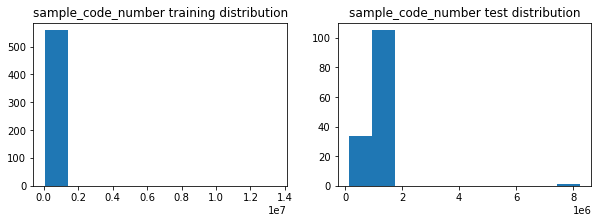

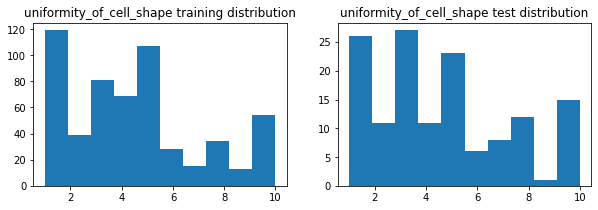

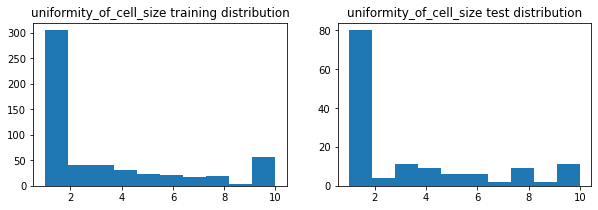

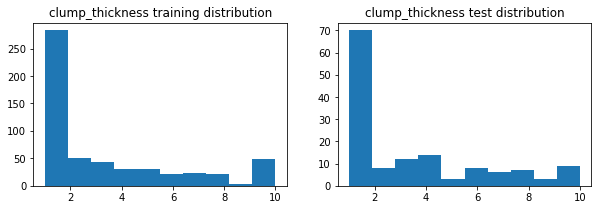

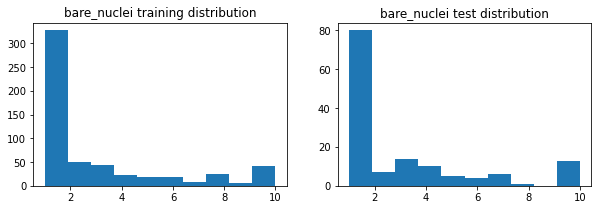

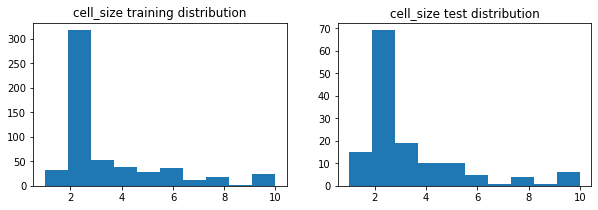

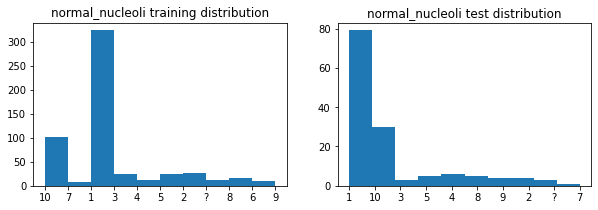

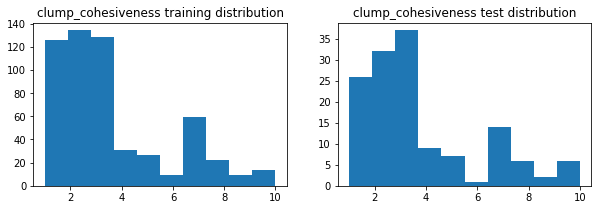

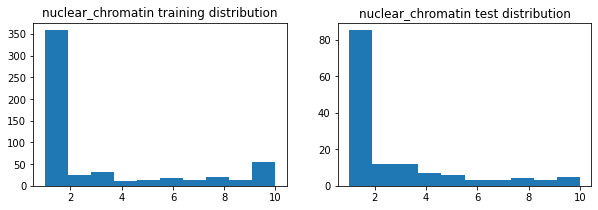

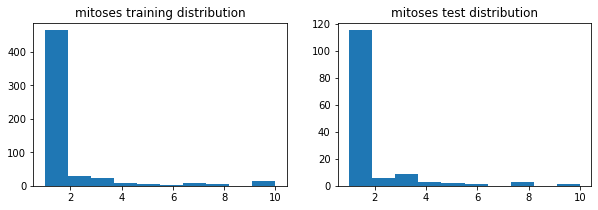

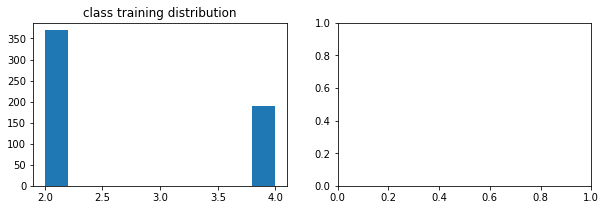

In [8]:
for col in data.columns:
    fig, axs = plt.subplots(1, 2, figsize=[10, 3])
    axs[0].hist(data[col])
    axs[0].set_title(col + " training distribution")
    if not data_test[col].isna().all():
        axs[1].hist(data_test[col])
        axs[1].set_title(col + " test distribution")

Apart from `sample_code_number`, whcih acts as unique identifier and will be dropped before training, and `class`, which obviously only has 2 values, all other variables show different types of distribution. Many of them show a large prevalence of a few values. Some class of models, e.g. linear models, assume that the independent variables used as input are normally distributed (normal = Gaussian, in this context). Also, they all have values between 1 and 10.


We might want to do some variable pre-processing before feeding them to our machine learning models.

__Are variables correlated?__ Correlations can give us first hints on which variables could be most useful for predictions. Two examples:
- When two independent variables (i.e. those used as input for our models) are highly correlated, we could think of just using one of the two and dropping the other, since they carry "similar information"
- When one independent variable correlates with the desired target variable (e.g. a large asymmetry of the lump correlates with the label being malign) then we have a strong indication that that variable is highly informative, and we should be sure to include it in our model.

There are a bunch of possible correlations to be calculated. Here we limit ourselves to [Pearson's correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient):

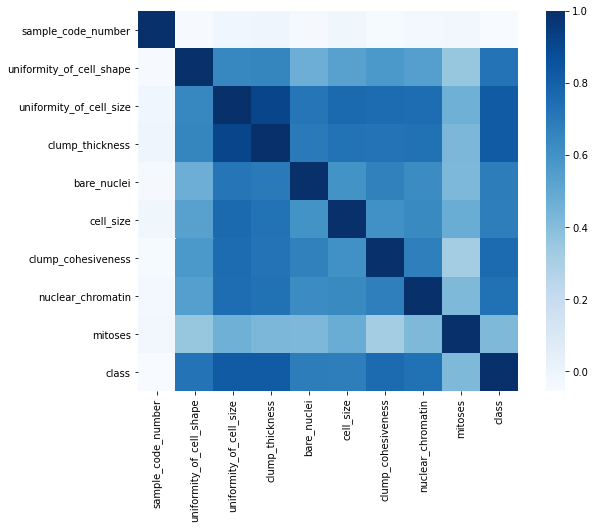

In [9]:
# only done here for training dataset
correlation_matrix = data.corr()
fig = plt.figure(figsize=(10, 7))
ax = plt.axes()
ax = sns.heatmap(correlation_matrix, mask=np.zeros_like(correlation_matrix, dtype=np.bool), cmap="Blues", square=True, ax = ax)
plt.show()

Here a value close to 1 indicates strong correlation, a value close to 0 a weak/absent correlation.

### Data quality
__How much data is missing?__ Check whether the data contains any null / NaN values or if any values do not correspond to the anticipated datatypes.

In [10]:
# For each column the number of missing entries ("null entries") is returned
data.isnull().sum()

sample_code_number          0
uniformity_of_cell_shape    0
uniformity_of_cell_size     0
clump_thickness             0
bare_nuclei                 0
cell_size                   0
normal_nucleoli             0
clump_cohesiveness          0
nuclear_chromatin           0
mitoses                     0
class                       0
dtype: int64

In [11]:
data_test.isnull().sum()

sample_code_number            0
uniformity_of_cell_shape      0
uniformity_of_cell_size       0
clump_thickness               0
bare_nuclei                   0
cell_size                     0
normal_nucleoli               0
clump_cohesiveness            0
nuclear_chromatin             0
mitoses                       0
class                       140
dtype: int64

The training set has no missing values (labelled with `NaN`), which is good! The test set only has missing values for the `class` attribute, but we know that is ok, because it's the attribute we want to predict.

In [12]:
data.dtypes

sample_code_number           int64
uniformity_of_cell_shape     int64
uniformity_of_cell_size      int64
clump_thickness              int64
bare_nuclei                  int64
cell_size                    int64
normal_nucleoli             object
clump_cohesiveness           int64
nuclear_chromatin            int64
mitoses                      int64
class                        int64
dtype: object

In [13]:
data_test.dtypes

sample_code_number            int64
uniformity_of_cell_shape      int64
uniformity_of_cell_size       int64
clump_thickness               int64
bare_nuclei                   int64
cell_size                     int64
normal_nucleoli              object
clump_cohesiveness            int64
nuclear_chromatin             int64
mitoses                       int64
class                       float64
dtype: object

The feature column `normal_nucleoli` is of datatype `object`, although it should contain only digits. Let's check which non-digit values can be found in the dataframe using the `isdigit()` function of pandas.

In [14]:
data[~data['normal_nucleoli'].str.isdigit()][['normal_nucleoli']]

,normal_nucleoli
33,?
48,?
65,?
89,?
104,?
181,?
231,?
276,?
343,?
398,?


In [15]:
data_test[~data_test['normal_nucleoli'].str.isdigit()][['normal_nucleoli']]

,normal_nucleoli
82,?
102,?
133,?


How do we deal with the `?` entries in the datasets? We need to use a so-called imputation strategy. There are a number of strategies to use, depending on your use case:
- Are the true values available somehwere? (maybe the doctor who inserted the data forgot those..)
- Drop entries with missing values (not advised if you don't have too much data)
- Drop columns with too many missing values
- Replace missing values with mean/median/else of values in the same column
- Train a separate model to predict the missing values based on the other attributes (probably the method introducing the least bias, but also the one requiring the most work)
- [...]


## Data Preparation
### Select data
__Which variables to use as input?__ All the available ones, except `sample_code_number`. Let's remove it:

In [16]:
data.drop('sample_code_number', axis=1, inplace=True)
data_test.drop('sample_code_number', axis=1, inplace=True)

### Clean data
The analysis of missing values performed above told us we need to correct for missing values in the `normal_nucleoli` column. In this case we replace the `?` with the median value in the same column.
To do so we first convert them to `NaN` and then use pandas `fillna()` method:

In [17]:
data["normal_nucleoli"] = data["normal_nucleoli"].replace(to_replace='?', value=np.nan)
data_test["normal_nucleoli"] = data_test["normal_nucleoli"].replace(to_replace='?', value=np.nan)

data["normal_nucleoli"] = data["normal_nucleoli"].fillna(data["normal_nucleoli"].median())
data_test["normal_nucleoli"] = data_test["normal_nucleoli"].fillna(data["normal_nucleoli"].median())

Additionally, we'd want to convert the class labels to `0` and `1`, to simplify compatibility with sklearn functions

In [58]:
data["class"] = data["class"].map({2: 0, 4: 1})

### Feature engineering
You can think of fabricating additional features (especially if you have domain knowledge on the subject) to increase performance, or speed up training. 

We have also seen that all the independent variables are distributed between 1 and 10. It is common practice to re-scale the values before training (see [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) for a nice overview of the most common used methods). This can be done manually at this stage, or it can be automatically integrated in our machine learning pipeline using the `Pipeline` object from scikit-learn. We'll follow the second approach. 

### Format data
We now split the labelled data into *training* and *validation* data. The former is the data which the model will actually see during the training phase and that it will learn to classify. The validation set is used just after the training is finished to calculate the goodness of the model using the selected metric (e.g. accuracy). Typically you will train several models with several hyperparameter combinations and select the one with the best metric score on the validation set. 

__Important:__ do __NOT__ use the metric score of the *training* set to determine your best model. This is because a complex-enough model might simply learn to recognize all the training examples "by heart" and fail to recognize any other new example. This is called overfitting, and its trademark is a very high training metric score combined with a significantly lower validation score.

In [59]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25)

The *test* set here will be used only at the end of the modeling phase, after we have selected our best model based on the results on the validation set. Our best model will predict the (unknown) class of the examples, and will generate a file for the submission.

In [19]:
X_test = data_test[data_test.columns[:-1]]

## Modeling
### Select modeling techniques:
__Which classes of algorithms to use?__ For a binary classification problem like this there is *a lot* of possible algorithms to experiment with. If we stay away from deep learning for now, you can get an idea of the most used algorithms (and many more) by looking at [Scikit-Learn's documentation](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). This part of the pipeline typically involves a lot of experiments, and each data scientist has his/her own personal approach. Here a couple of useful guidelines:
- __Start simple:__ You might spend a week tuning the hyperparameters of a super fancy multilayer perceptron, to then realize that it has a very similar performance to a vanilla logistic regression. "Simple" linear models sometimes have enough predictive power to exceed the business requirements set out in the initial phase, and have the advantage of being much easier to interpret and to tweak. If those models are not enough, then it is of course meaningful to experiment with more complex models.
- __Combine predictions:__ The vast majority of deployed machine learning applications in the real world combine the predictions of different trained models. This technique, sometimes known as ensembling or bag of models, can be very powerful, because if used correctly it can combine the strengths of different models.
- __Plan your experiments:__ It is good to have an intuitive understanding of what the different hyperparameters of a model do, and try to guess the impact of changing one of them on the performance. But generally the only way to find out is to try it out, and to compare the new result with a baseline. It might sound trivial, but be sure you choose your baseline correctly: if you want to comapre two different loss functions on a `LogisticRegression` model, be sure that the `loss` parameter is the only difference between them! Otherwise you can't really isolate the effect of that parameter.

In [67]:
model = LogisticRegression(verbose=1)

It is good practice to preprocess the training data before feeding it to the model. Scikit-learn offers [a variety of preprocessors](https://scikit-learn.org/stable/modules/preprocessing.html). 

Another very convenient thing is to combine preprocessing and modeling directly in a pipeline, using the `Pipeline` class. In this way we can run training and prediction with one command each.

In [68]:
pipe = Pipeline([("preprocessing", StandardScaler()),
                 ("model", model)])

### Define metrics and hyperparameters
__What is my model exactly optimizing?__ You are not supposed to know all the math behind each model you train, but a general idea is typically useful. Scikit-learn's [User Guides](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) are as good material as you can get, if you really want to go deep. 

__What measure do I have of its goodness?__ For a binary classification process a first choice could be simply looking at the accuracy. Remembering however that we have a class imbalance, it could be a good idea to look at precision and recall as well. For this use case we'll look at the F1-Score, which combines them.

__What hyperparameters do I need to set before starting training?__ Always refer to the documentation to understand which parameters you have available (both for the model and for the preprocessor). It is a good idea to start with the default values (they're default for a reason), then play around with some of the most commmon (es. change loss function, change regularization loss and coefficient). If you see promising results with that model, you can perform a grid search and optimize the parameters automatically.

### Model artifacts
__Do I need to save the trained model?__ Definitely a good idea. Ideally you'd also want to store more information about the whole trainig process in a log file.

In [27]:
results_dir = Path("./results")

### Execute
Let's train that model!

In [69]:
# model training
pipe.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Pipeline(steps=[('preprocessing', StandardScaler()),
                ('model', LogisticRegression(verbose=1))])

In [70]:
# model forecasting
y_pred = pipe.predict(X_valid)
print("F1-Score for trained model: " + str(np.round(f1_score(y_valid.values, y_pred), 4)))

F1-Score for trained model: 0.9583


In [64]:
# save trained pipeline
dump(pipe, Path(results_dir/ "logistic_regression_default_pars.joblib"))

['results\\logistic_regression_default_pars.joblib']

### Bonus: Cross-Validation
Instead of a single train/validation split, it is possible to "cut" the data in different ways, train models on the various slices, and combine the predictions. In the following we also provide a function to test several models at the same time, by adding them to a list:

In [71]:
algorithms = [
    LogisticRegression(),
    LinearSVC(),
    SGDClassifier()
]

In [76]:
def model_selection(X, y, algorithms, n_splits=10, test_size=.3, train_size=.6, random_state=0):
    """Select the most accurate machine learning model from a given list.

    Parameters
    ----------
    X : array-like
        dataFrame to fit
    y : array-like
        target variable to predict
    algorithms : array-like
        scikit-learn model objects
    n_splits : int
        number of re-shuffling & splitting iterations
    test_size : float, int
        proportion of the dataset to include in the test split
    train_size : float, int
        proportion of the dataset to include in the train split
    random_state : int
        random seed
    
    Returns
    -------
    algorithm_comparision : array-like
        dataframe containing the algorithm's attributes and accuracy 
    """
    # Define the cross-validation split, leaving out 10%
    cv_split = ShuffleSplit(n_splits=n_splits,test_size=test_size,
                            train_size=train_size,random_state=random_state)
    
    # Create a table to compare the algorithm's metrics and predictions
    columns = ['name','params','mean_train_accuracy','mean_test_accuracy','test_accuracy_3std' ,'time']
    algorithm_comparison = pd.DataFrame(columns = columns)

    row_index = 0
    
    for alg in algorithms:

        # Set name and parameters of the algorithm
        algorithm_name = alg.__class__.__name__
        algorithm_comparison.loc[row_index, 'name'] = algorithm_name
        algorithm_comparison.loc[row_index, 'params'] = str(alg.get_params())

        # Score model with cross validation using the accuracy metric
        cv_results = cross_validate(alg, X, y, cv=cv_split, scoring='f1', return_train_score=True)
        algorithm_comparison.loc[row_index, 'time'] = cv_results['fit_time'].mean()
        algorithm_comparison.loc[row_index, 'mean_train_accuracy'] = cv_results['train_score'].mean()
        algorithm_comparison.loc[row_index, 'mean_test_accuracy'] = cv_results['test_score'].mean()  
        algorithm_comparison.loc[row_index, 'test_accuracy_3std'] = cv_results['test_score'].std()*3

        row_index+=1

    algorithm_comparison.sort_values(by = ['mean_test_accuracy'], ascending = False, inplace = True)
    
    return algorithm_comparison

In [77]:
model_selection(X,y,algorithms)

,name,params,mean_train_accuracy,mean_test_accuracy,test_accuracy_3std,time
0,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.969918,0.951921,0.0548802,0.00976126
1,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.966595,0.950094,0.0592364,0.00575945
2,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_wei...",0.952069,0.940515,0.107611,0.00361443


After conducting the model selection, it is possible to conduct a hyperparameter search to improve the model performance even further. 

### Bonus: Explainability
More and more often it is not enough for a machine learning to simply predict `0` or `1`, or a probability for each of them. As AI applications are increasingly used in sensitive sectors (es. healthcare, but not only that) it is important that whoever uses the model can understand, at least to a certain degree, how and why a model came up with a specific prediction. This is where __AI Explainability__ comes in play: it consists of a variety of techniques developed to shed light on the model's learning process and predictions. If you are interested on an overview on the topic, you can have a look [here](https://ai-explainability-360.org/).

For our use case, it would be great if we could provide the doctors from Watson Hospital with some indication of which indicators are, according to the model, the most important ones to derive its predictions. One highly used package offering some interesting features is [shap](https://github.com/slundberg/shap)

In [85]:
import shap
shap.initjs()
explainer = shap.KernelExplainer(pipe.predict, 
                                 shap.sample(X_train, 100))

shap_values = explainer.shap_values(X_valid)

Given a trained model (our `pipe`) shap builds an `Explainer` object, which, *simplifying*, evaluates the impact of each feature on the predictions by checking what would happen by changing or removing that feature. These impacts are called Shapley values, and we can use them to get an idea on the most important features for our model.

For a more exact explanation of shap, see [here](https://christophm.github.io/interpretable-ml-book/shap.html).

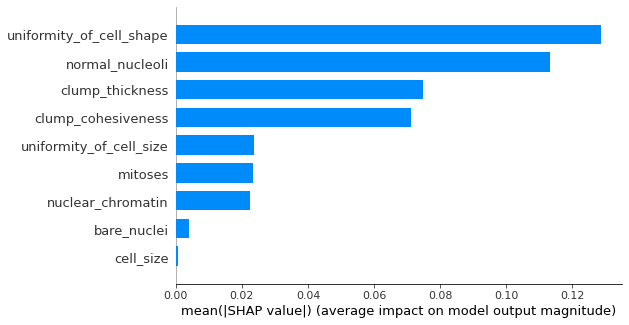

In [91]:
shap.summary_plot(shap_values, plot_type="bar", feature_names=data.columns[:-1])

Here we see what on average the most important features used by the model are. This plot could be shown to medical experts to assess if the model has effectively learned from "meaningful" features or not! This is called a *global* explanation because it looks at the overall impact of each feature on all of the model's predictions.

We might also be interested in explaining specific examples from the validation set, maybe those where our model is not so sure about its predictions.

In [98]:
#change this number to look at different examples
example_number = 3

shap.force_plot(explainer.expected_value, shap_values[example_number], feature_names=data.columns[:-1])

In [105]:
example_number = 35

shap.force_plot(explainer.expected_value, shap_values[example_number], feature_names=data.columns[:-1])

These so-called "force plots" show you exactly how much each of the features contributes to the final prediction (which is `0` for a benign tumor, and `1` for a malign on). As a sanity check, you can notice that the most important features for these examples, i.e. those with the largest bar, tend to be the most important ones obtained with `shap.summary_plot` above.

## Train Final Model & Submit results
Once you've chosen your best model, you can train that again using all available training data (i.e. not holding out any data for validation).

In [80]:
model = LinearSVC()
pipe = Pipeline([("preprocessing", StandardScaler()),
                 ("model", model)])
pipe.fit(X, y)

Pipeline(steps=[('preprocessing', StandardScaler()), ('model', LinearSVC())])

Finally, let's put our model to work and predict on the validation data.

In [81]:
y_pred = pipe.predict(X_test)

print('Number of Predictions:',len(y_pred))
print('Prediction Contents:',y_pred[:10])

Number of Predictions: 140
Prediction Contents: [0 0 1 0 0 1 0 1 1 1]


Save the predictions as a csv file and name it after your team, so they can be submitted for evaluation.

In [82]:
pd.Series(y_pred).to_csv(data_directory / 'YOUR_TEAM_NAME.csv',sep=',',index=False)

**Author**: Daniel Jaeck, Data Scientist at IBM (daniel.jaeck@de.ibm.com)

Extended by: Marco Perini, Data Scientist at IBM (marco.perini@ibm.com) 

Copyright © IBM Corp. 2021. This notebook and its source code are released under the terms of the MIT License.